In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/americancitizenincome/income.csv


In [2]:
income = pd.read_csv("/kaggle/input/americancitizenincome/income.csv")
income

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,40,Private,130834,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
24996,31,Local-gov,33124,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
24997,38,Federal-gov,190895,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,?,>50K
24998,23,Private,420973,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

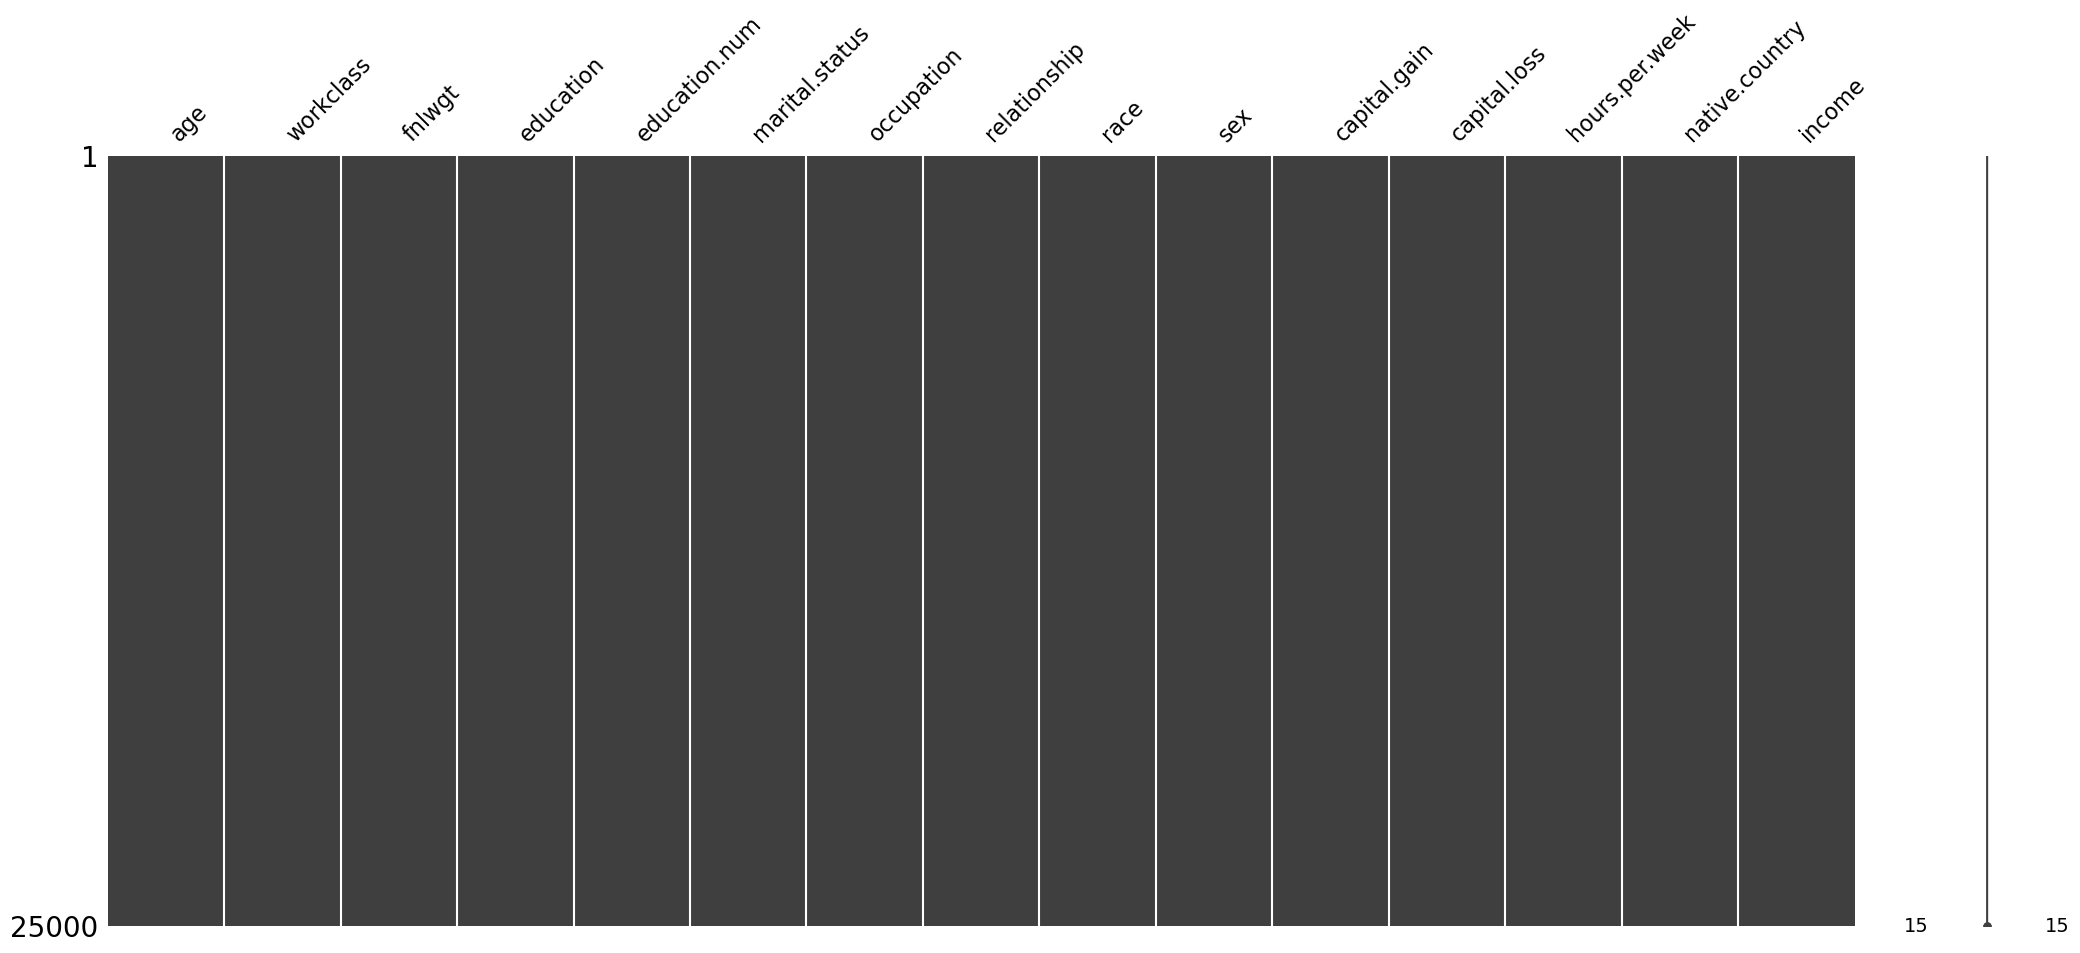

In [3]:
import missingno as msno
msno.matrix(income)   # checking for missing values

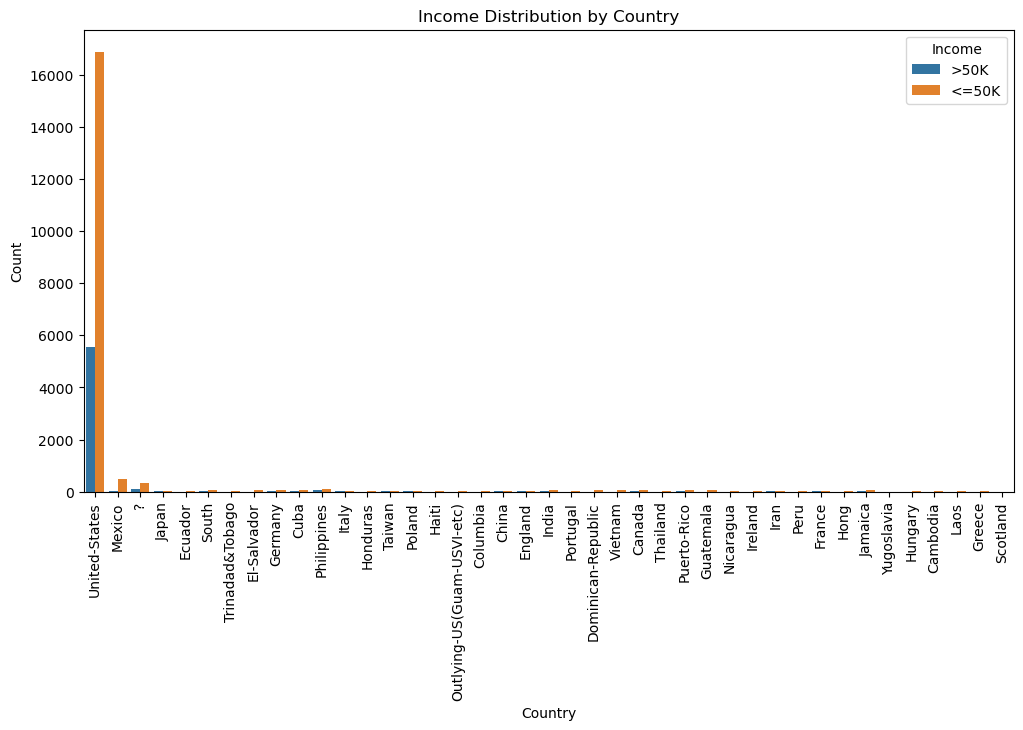

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = income

# Plotting the count of each income category for each country
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='native.country', hue='income')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Income Distribution by Country')
plt.legend(title='Income', loc='upper right')
plt.show()


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


# Descriptive Statistics
numerical_cols = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
descriptive_stats = df[numerical_cols].describe()
print("Descriptive Statistics:")
print(descriptive_stats)
print()


Descriptive Statistics:
               age  education.num  capital.gain  capital.loss  hours.per.week
count  25000.00000   25000.000000  25000.000000  25000.000000    25000.000000
mean      38.60916      10.076320   1083.144040     87.489800       40.442800
std       13.68660       2.576967   7321.971568    402.830246       12.309706
min       17.00000       1.000000      0.000000      0.000000        1.000000
25%       28.00000       9.000000      0.000000      0.000000       40.000000
50%       37.00000      10.000000      0.000000      0.000000       40.000000
75%       48.00000      12.000000      0.000000      0.000000       45.000000
max       90.00000      16.000000  99999.000000   4356.000000       99.000000



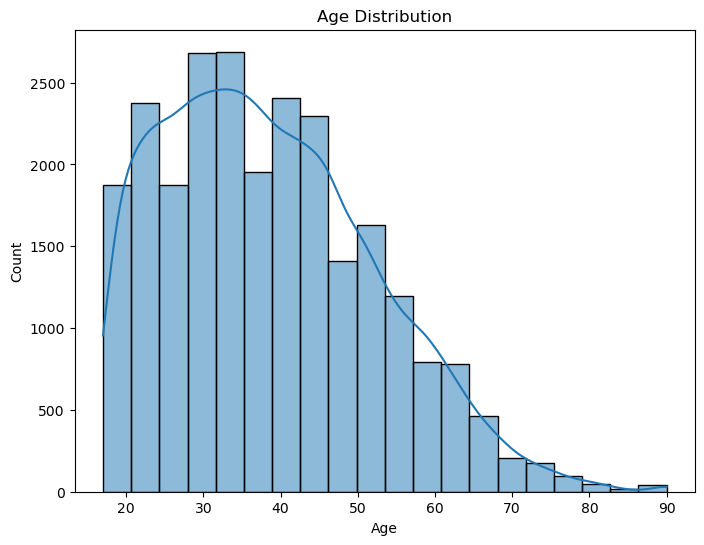

In [6]:
# Data Visualization: Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()



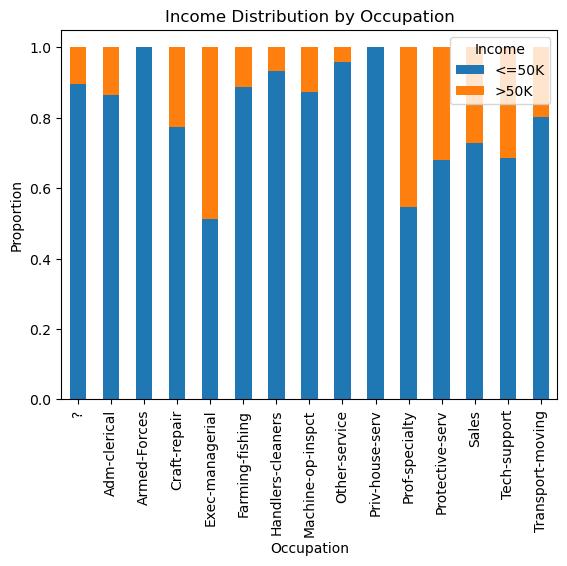

In [7]:
# Grouping and Aggregation: Average income by occupation
occupation_income = df.groupby('occupation')['income'].value_counts(normalize=True).unstack()
occupation_income.plot(kind='bar', stacked=True)
plt.xlabel('Occupation')
plt.ylabel('Proportion')
plt.title('Income Distribution by Occupation')
plt.legend(title='Income')
plt.show()



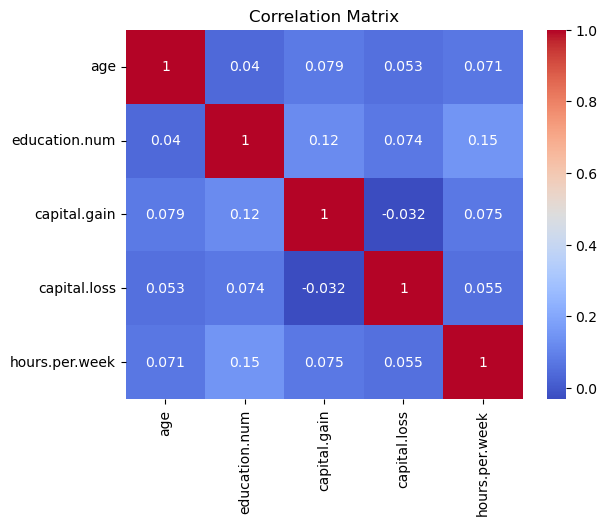

In [8]:
# Correlation Analysis
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [9]:
# Hypothesis Testing: T-test
income_high = df[df['income'] == '>50K']['education.num']
income_low = df[df['income'] == '<=50K']['education.num']
t_statistic, p_value = stats.ttest_ind(income_high, income_low)
print("T-Test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print()



T-Test Results:
T-statistic: 56.85227629822517
P-value: 0.0



In [10]:

# Feature Importance: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# One-Hot Encoding for categorical columns
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
df_encoded = pd.get_dummies(df, columns=categorical_cols)


X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

rf = RandomForestClassifier()
rf.fit(X, y)
importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
importance.sort_values(by='Importance', ascending=False, inplace=True)
print("Feature Importance:")
print(importance)
print()

# Outlier Detection: Z-score method
z_scores = stats.zscore(df_encoded[numerical_cols])
outliers = df_encoded[(z_scores > 3).any(axis=1)]
print("Outliers:")
print(outliers)


Feature Importance:
                                      Feature  Importance
1                                      fnlwgt    0.157252
0                                         age    0.146133
3                                capital.gain    0.097456
5                              hours.per.week    0.080011
2                               education.num    0.065660
..                                        ...         ...
93  native.country_Outlying-US(Guam-USVI-etc)    0.000030
28                        education_Preschool    0.000020
40                    occupation_Armed-Forces    0.000011
81                    native.country_Honduras    0.000009
9                      workclass_Never-worked    0.000002

[107 rows x 2 columns]

Outliers:
       age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
0       40  223881             15         99999             0              70   
68      36   48093             10             0             0              92   
73    

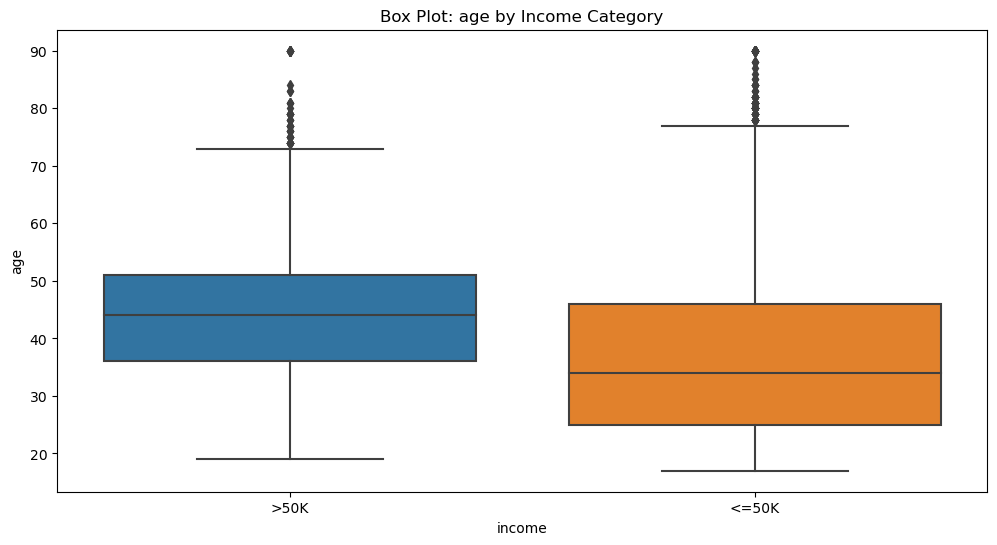

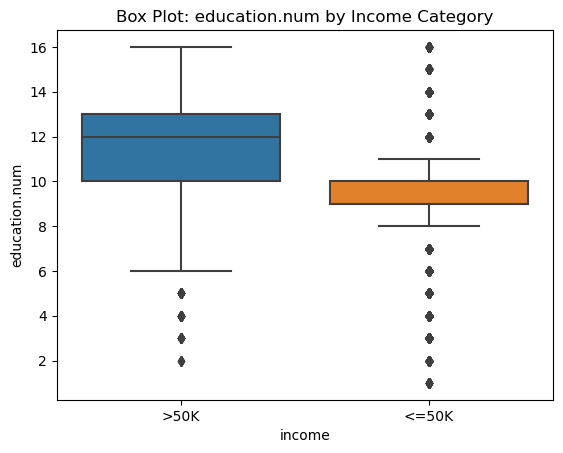

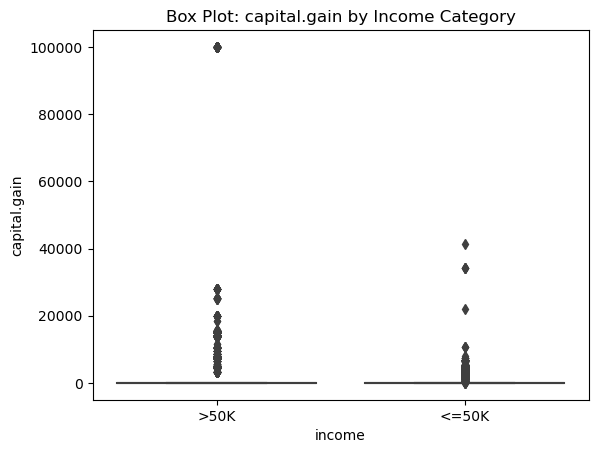

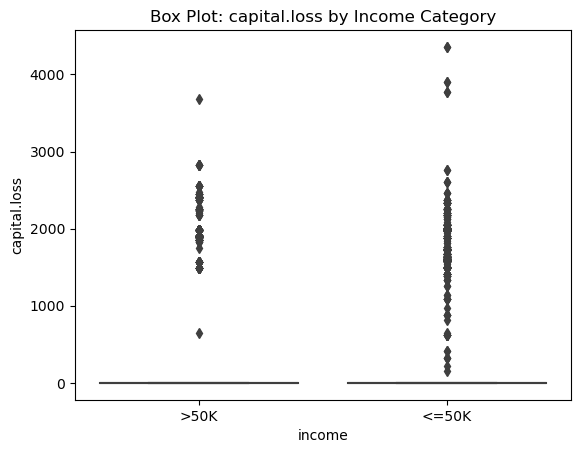

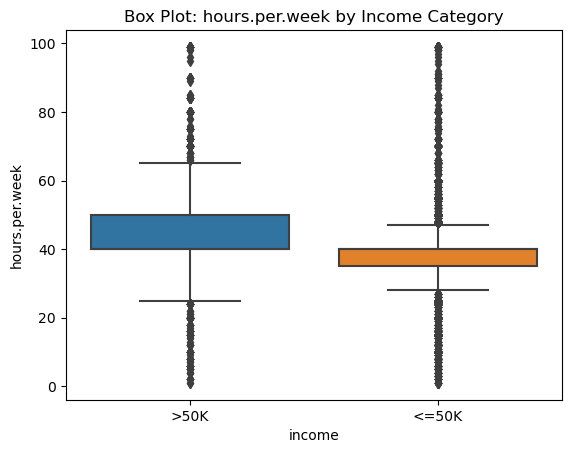

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


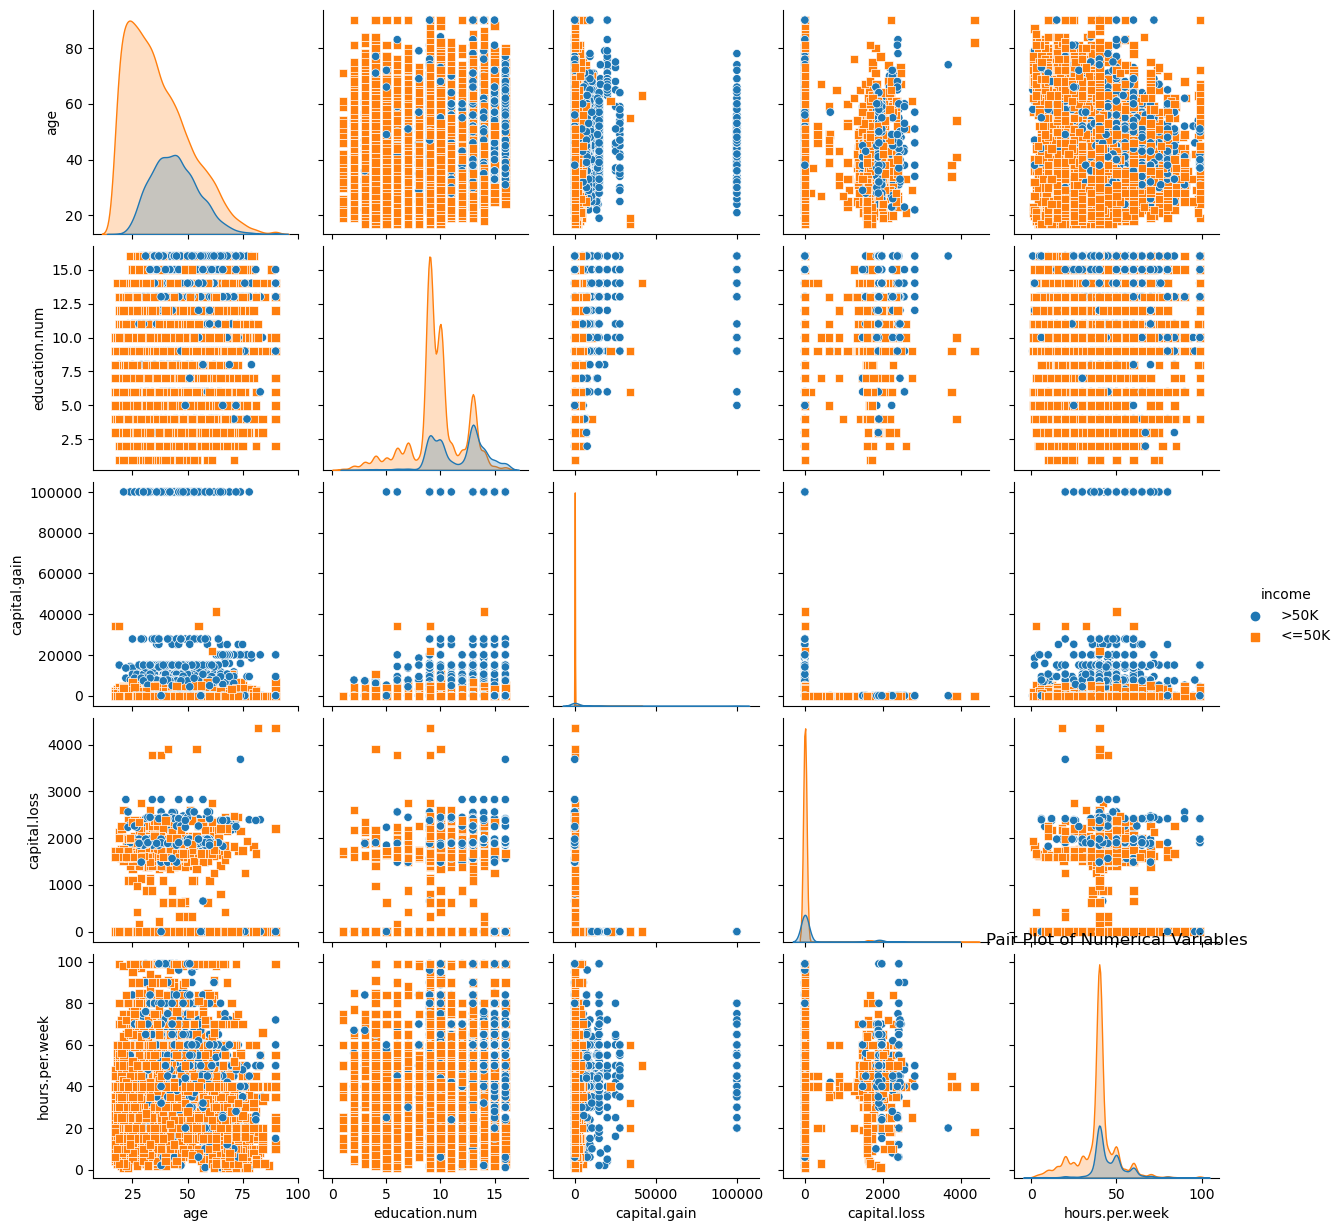

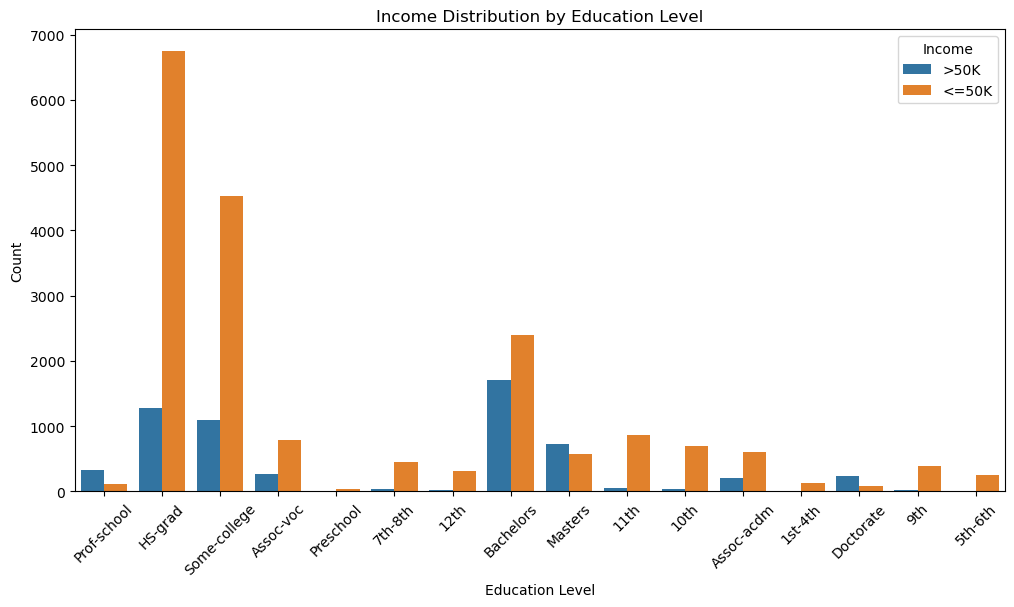

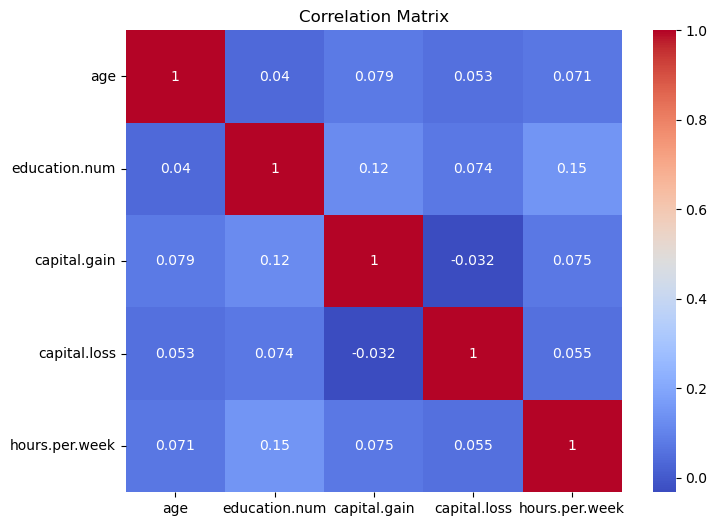

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Box Plot: Distribution of numerical variables by income category
numerical_cols = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
plt.figure(figsize=(12, 6))
for col in numerical_cols:
    sns.boxplot(data=df, x='income', y=col)
    plt.title(f'Box Plot: {col} by Income Category')
    plt.show()

# Pair Plot: Relationships between numerical variables
sns.pairplot(data=df, vars=numerical_cols, hue='income', markers=['o', 's'], diag_kind='kde')
plt.title('Pair Plot of Numerical Variables')
plt.show()

# Bar Chart: Distribution of income categories by education level
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', hue='income')
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Income Distribution by Education Level')
plt.legend(title='Income', loc='upper right')
plt.show()

# Heatmap: Correlation matrix
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



<Figure size 2000x1900 with 0 Axes>

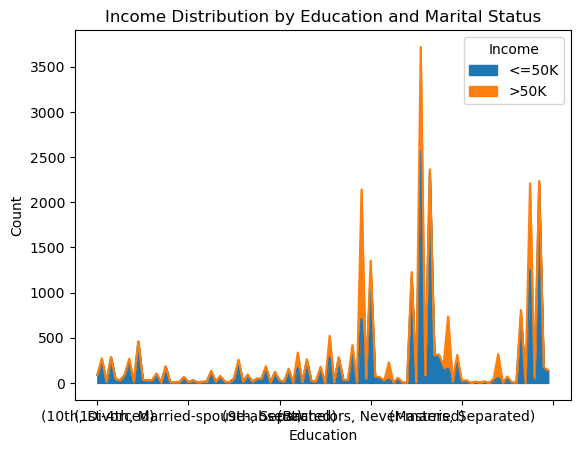

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Stacked Area Chart: Income distribution by education and marital status
plt.figure(figsize=(20, 19))
df_grouped = df.groupby(['education', 'marital.status'])['income'].value_counts().unstack()
df_grouped.plot(kind='area', stacked=True)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Income Distribution by Education and Marital Status')
plt.legend(title='Income')
plt.show()



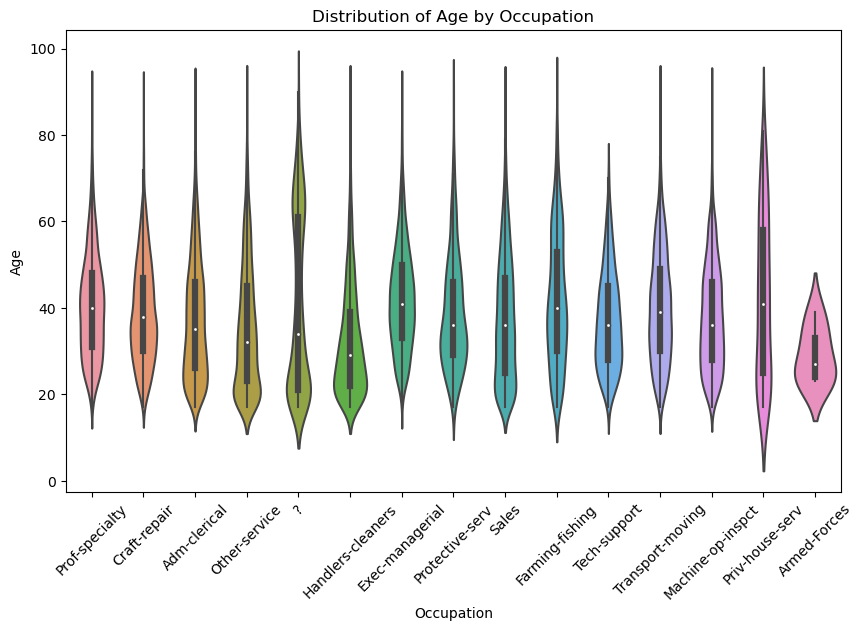

In [13]:
# Violin Plot: Distribution of age by occupation
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='occupation', y='age')
plt.xticks(rotation=45)
plt.xlabel('Occupation')
plt.ylabel('Age')
plt.title('Distribution of Age by Occupation')
plt.show()


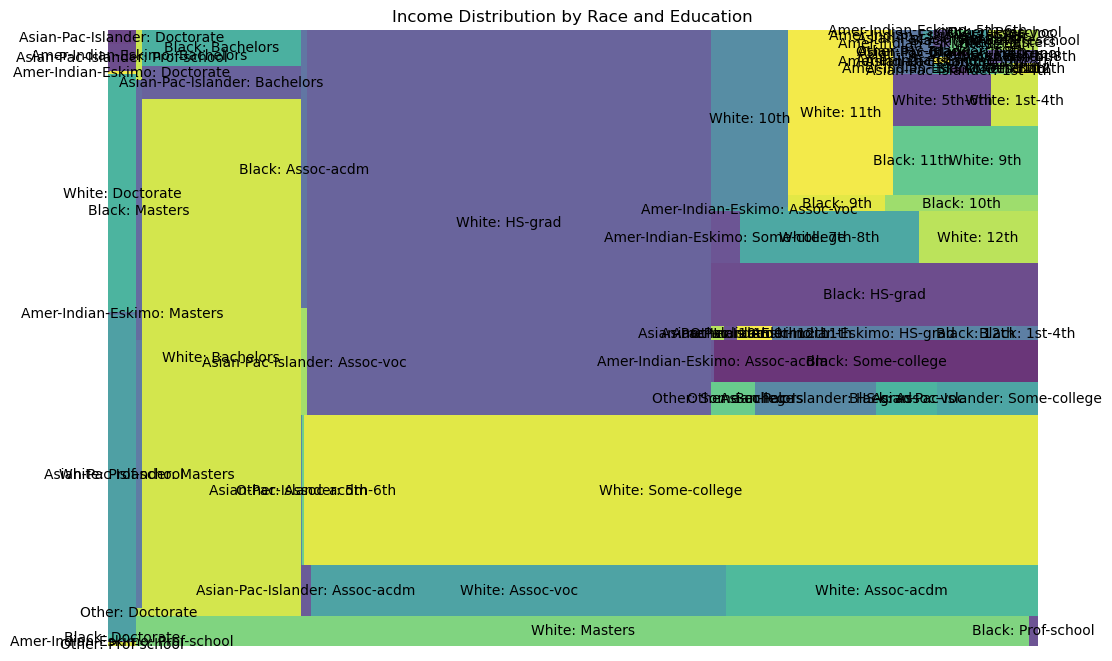

In [14]:
import pandas as pd
import squarify
import matplotlib.pyplot as plt


# Treemap: Income distribution by race and education
plt.figure(figsize=(12, 8))
df_grouped = df.groupby(['race', 'education'])['income'].value_counts().unstack()
df_grouped.reset_index(inplace=True)

# Normalize the income count for each race-education category
df_grouped['total_count'] = df_grouped[['<=50K', '>50K']].sum(axis=1)
df_grouped['income_ratio'] = df_grouped['>50K'] / df_grouped['total_count']

# Sort the dataframe by the income ratio in descending order
df_grouped.sort_values('income_ratio', ascending=False, inplace=True)

# Generate treemap coordinates
squarify.plot(sizes=df_grouped['total_count'], label=df_grouped['race'] + ': ' + df_grouped['education'], alpha=0.8, text_kwargs={'fontsize': 10})

# Decorate the treemap
plt.title('Income Distribution by Race and Education')
plt.axis('off')
plt.show()

# don't know how to fix the label overlapping issue.. pls suggest..


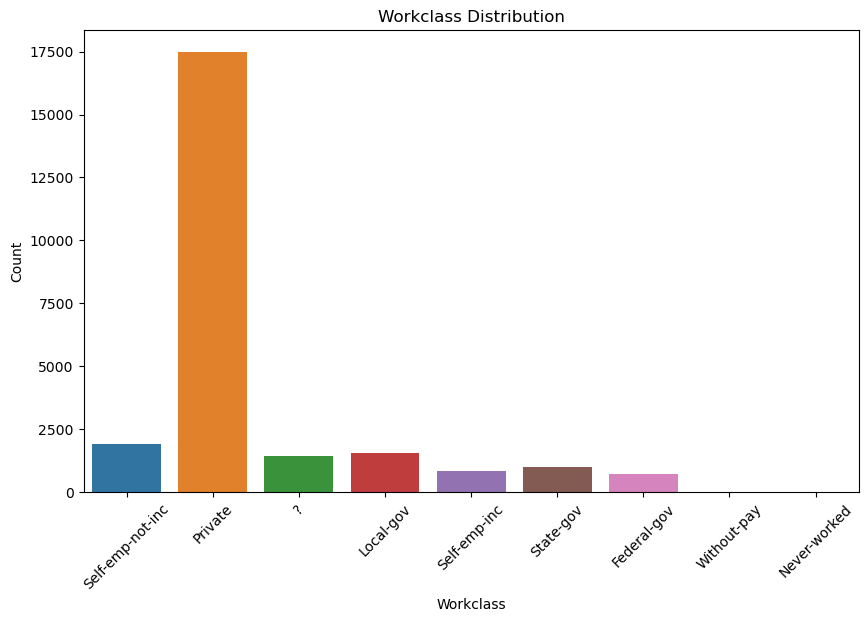

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Bar Plot: Workclass Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='workclass')
plt.xticks(rotation=45)
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Workclass Distribution')
plt.show()



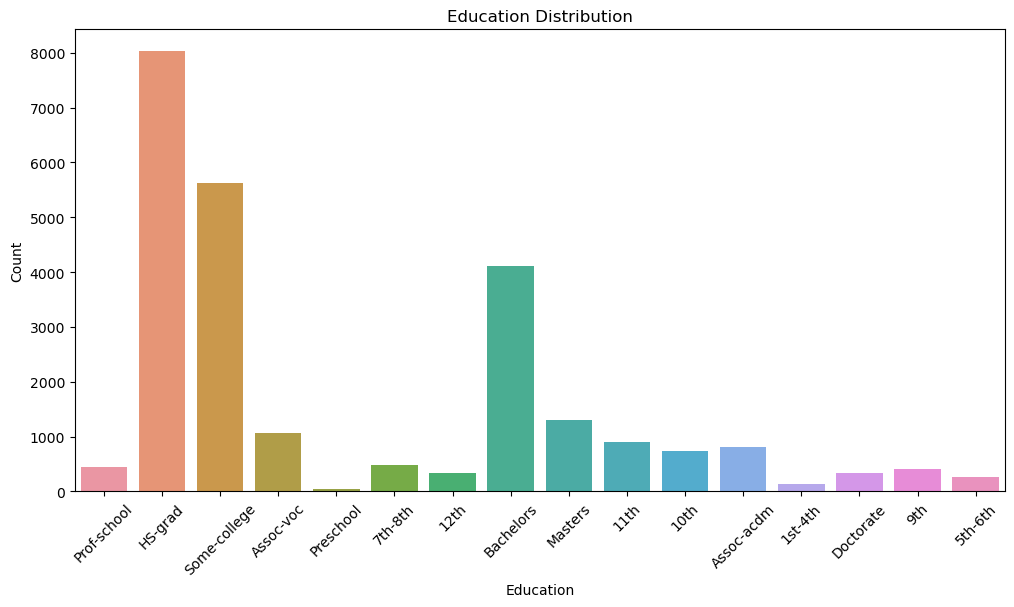

In [16]:
# Bar Plot: Education Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education')
plt.xticks(rotation=45)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution')
plt.show()




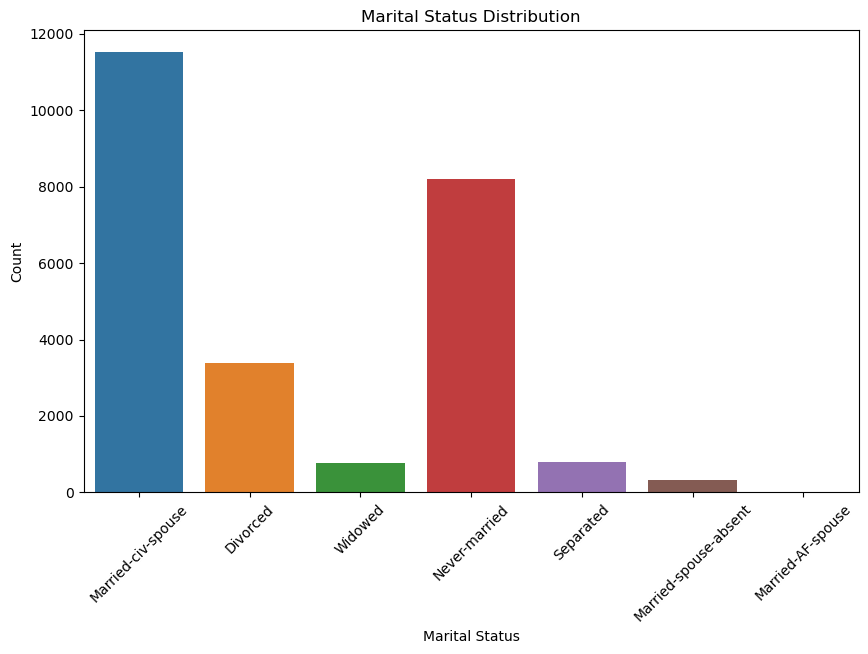

In [17]:
# Bar Plot: Marital Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='marital.status')
plt.xticks(rotation=45)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')
plt.show()



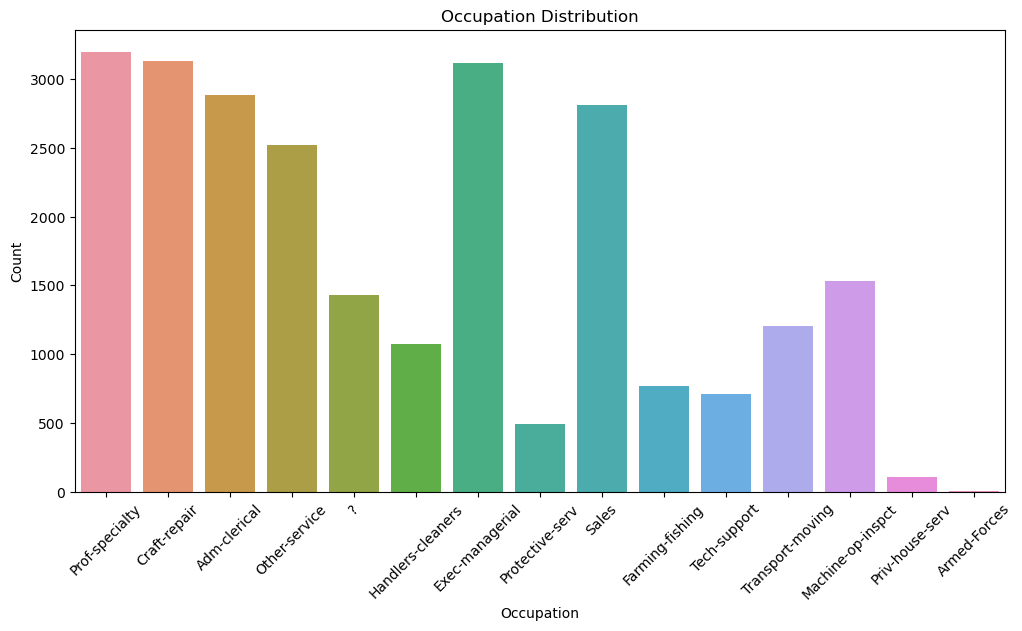

In [18]:
# Bar Plot: Occupation Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='occupation')
plt.xticks(rotation=45)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Distribution')
plt.show()



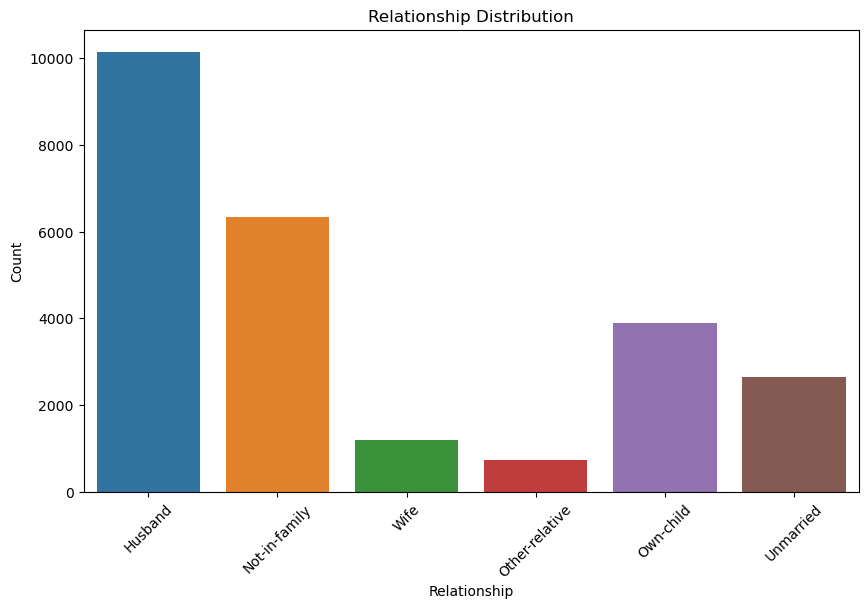

In [19]:
# Bar Plot: Relationship Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='relationship')
plt.xticks(rotation=45)
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.title('Relationship Distribution')
plt.show()



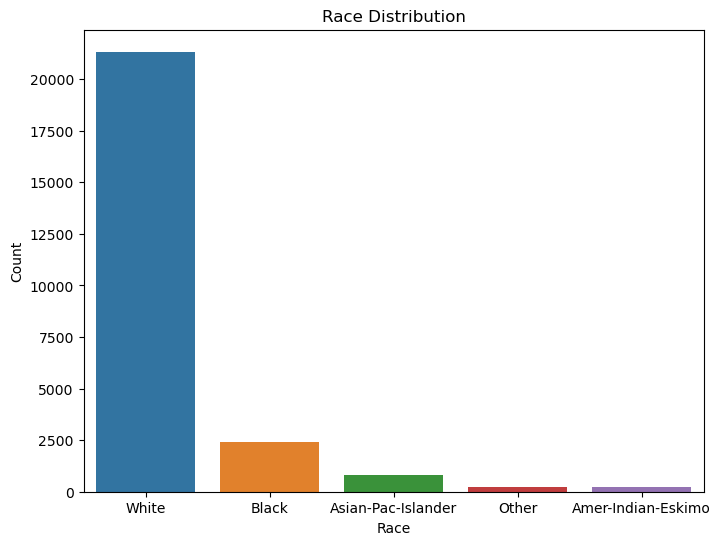

In [20]:
# Bar Plot: Race Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Race Distribution')
plt.show()



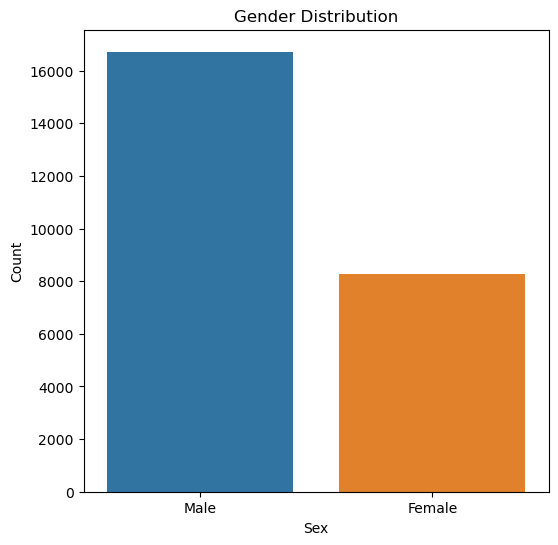

In [21]:
# Bar Plot: Gender Distribution
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()



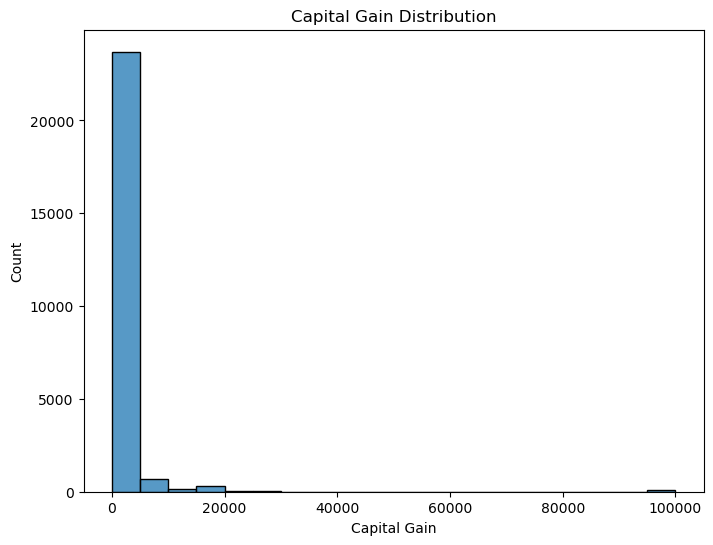

In [22]:
# Histogram: Capital Gain
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='capital.gain', bins=20)
plt.xlabel('Capital Gain')
plt.ylabel('Count')
plt.title('Capital Gain Distribution')
plt.show()



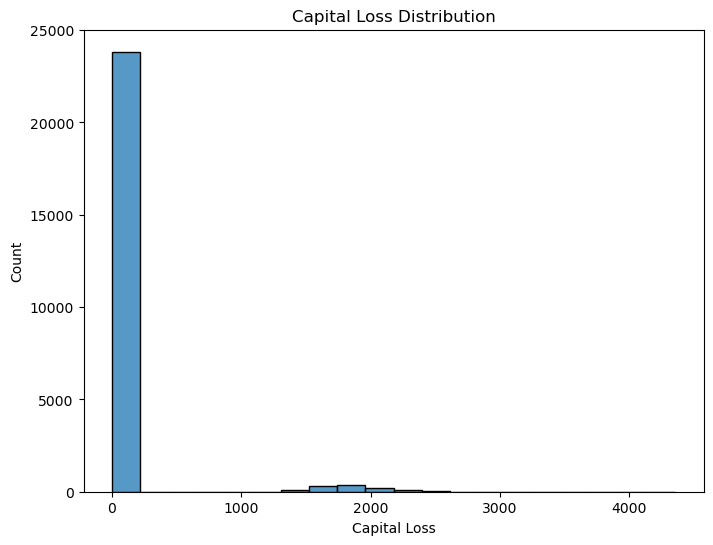

In [23]:
# Histogram: Capital Loss
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='capital.loss', bins=20)
plt.xlabel('Capital Loss')
plt.ylabel('Count')
plt.title('Capital Loss Distribution')
plt.show()



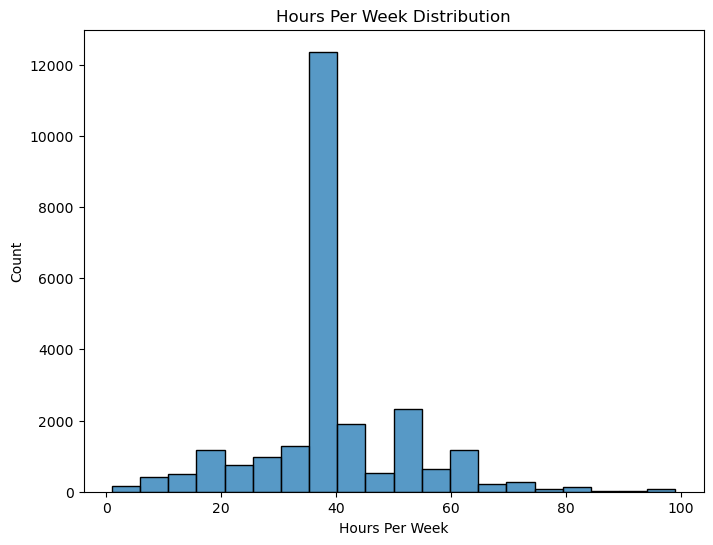

In [24]:
# Histogram: Hours Per Week
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='hours.per.week', bins=20)
plt.xlabel('Hours Per Week')
plt.ylabel('Count')
plt.title('Hours Per Week Distribution')
plt.show()



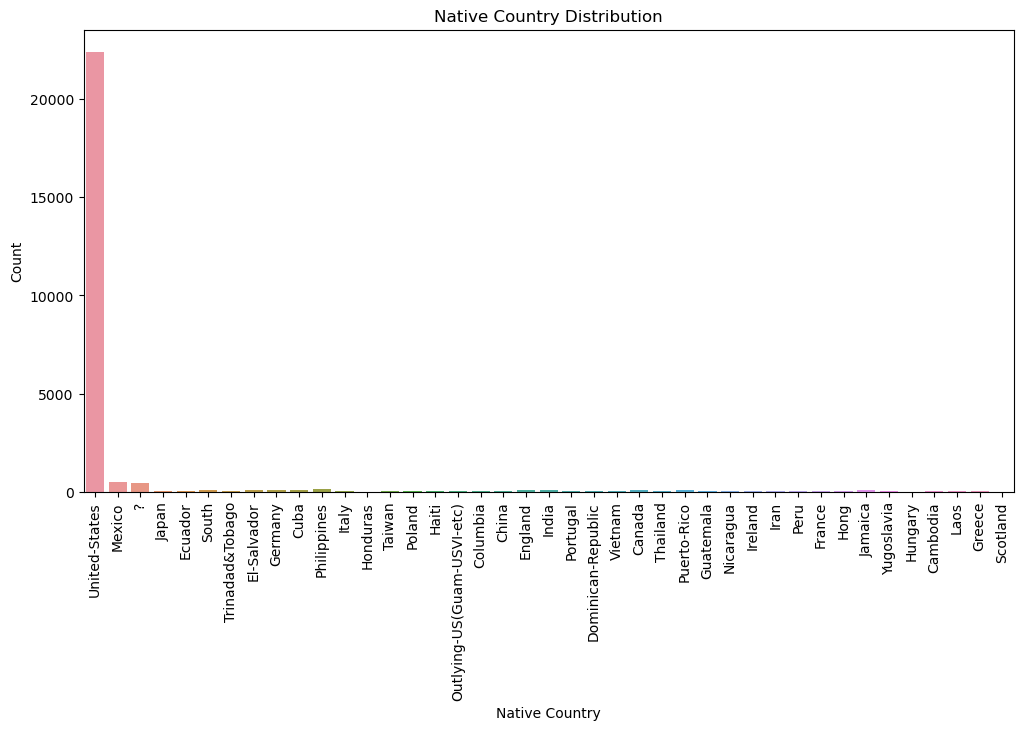

In [25]:
# Bar Plot: Native Country Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='native.country')
plt.xticks(rotation=90)
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.title('Native Country Distribution')
plt.show()

# **Modelling with random forrest**

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Prepare the data for modeling
X = df.drop('income', axis=1)  # Features
y = df['income']  # Target variable

# Perform label encoding for categorical variables
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      3755
        >50K       0.72      0.62      0.67      1245

    accuracy                           0.85      5000
   macro avg       0.80      0.77      0.79      5000
weighted avg       0.84      0.85      0.84      5000



# **Comparing random forrest and Logistic regression**

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Prepare the data for modeling
X = df.drop('income', axis=1)  # Features
y = df['income']  # Target variable

# Perform label encoding for categorical variables
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train and evaluate multiple models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"------ {model_name} ------")
    print(classification_report(y_test, y_pred))
    print()


------ Random Forest ------
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      3755
        >50K       0.72      0.62      0.67      1245

    accuracy                           0.85      5000
   macro avg       0.80      0.77      0.79      5000
weighted avg       0.84      0.85      0.84      5000




/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------ Logistic Regression ------
              precision    recall  f1-score   support

       <=50K       0.80      0.94      0.86      3755
        >50K       0.60      0.28      0.38      1245

    accuracy                           0.77      5000
   macro avg       0.70      0.61      0.62      5000
weighted avg       0.75      0.77      0.74      5000




# **Hyper parameterisation**

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Prepare the data for modeling
X = df.drop('income', axis=1)  # Features
y = df['income']  # Target variable

# Perform label encoding for categorical variables
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
print("------ Best Model ------")
print(f"Best Parameters: {best_params}")
print(classification_report(y_test, y_pred))


------ Best Model ------
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      3755
        >50K       0.75      0.63      0.69      1245

    accuracy                           0.86      5000
   macro avg       0.82      0.78      0.80      5000
weighted avg       0.85      0.86      0.85      5000



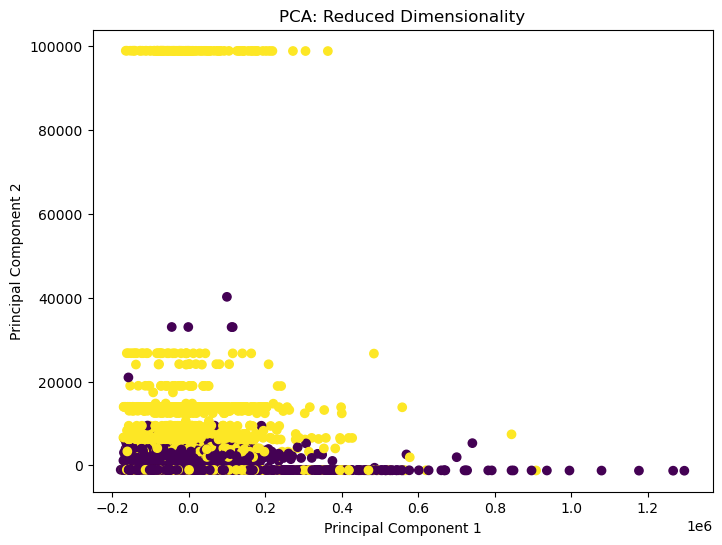

In [29]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt


# Prepare the data for dimensionality reduction
X = df.drop('income', axis=1)  # Features
y = df['income']  # Target variable

# Map income labels to numerical values
label_encoder = LabelEncoder()
y_numerical = label_encoder.fit_transform(y)

# One-hot encode categorical columns
categorical_columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)

# Create a scatter plot of the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numerical, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Reduced Dimensionality')
plt.show()


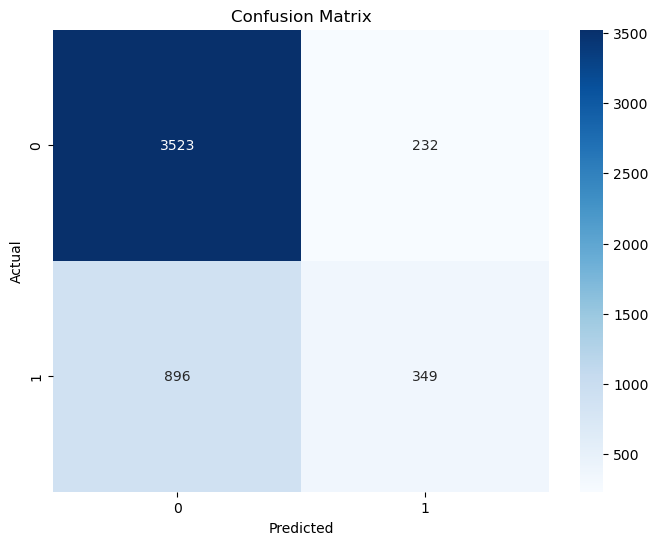

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have a trained model and test data
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


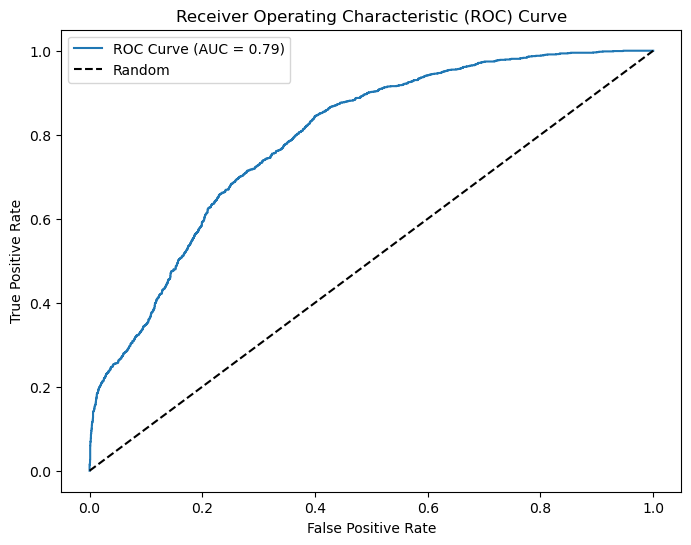

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Assuming you have predicted probabilities for binary classification
y_probs = model.predict_proba(X_test)[:, 1]

# Encode the target variable into binary classes
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_probs)

# Calculate AUC score
auc_score = roc_auc_score(y_test_encoded, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


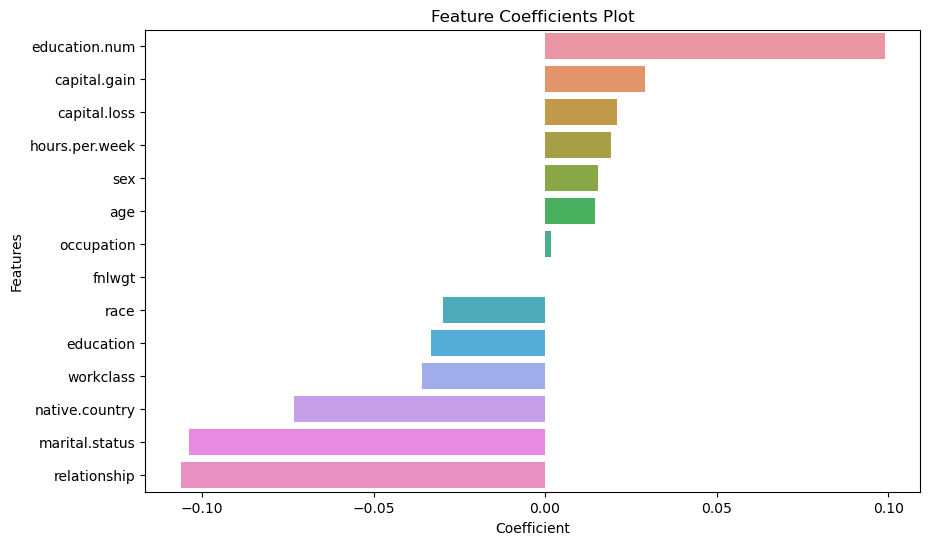

In [32]:
coefficients = model.coef_[0]
feature_names = X.columns

# Sort coefficients in descending order
sorted_indices = coefficients.argsort()[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_features = feature_names[sorted_indices]

# Create a bar plot of feature coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_coefficients, y=sorted_features)
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('Feature Coefficients Plot')
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_20/693422369.py:64: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_imputed, y_train)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

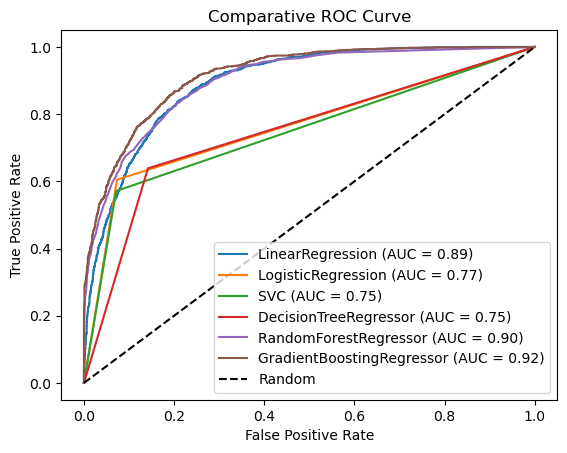

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/americancitizenincome/income.csv')

# Split the data into features (X) and target variable (y)
X = df.drop('income', axis=1)
y = df['income']

# Encode the target variable
y_encoded = pd.get_dummies(y, drop_first=True)

# One-hot encoding of categorical columns
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Imputation of missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Handling class imbalance
X_train_imbalanced, y_train_imbalanced = resample(X_train_imputed, y_train, random_state=42)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_imputed)
X_test_pca = pca.transform(X_test_imputed)

# Model Initialization
models = [
    LinearRegression(),
    LogisticRegression(),
    SVC(probability=True),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# Model Training and Prediction
model_names = []
auc_scores = []
for model in models:
    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)
    auc = roc_auc_score(y_test, y_pred)
    model_names.append(model.__class__.__name__)
    auc_scores.append(auc)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc:.2f})')

# Comparative ROC Curve
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparative ROC Curve')
plt.legend()
plt.show()
